<a href="https://colab.research.google.com/github/PKpacheco/pre_process_dados_puc/blob/main/aula_1_pre_proces_dados_vacinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vacinas

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import missingno as msno
from sklearn.preprocessing import StandardScaler
import matplotlib as plt

In [7]:

excel_incidence = pd.read_excel('https://bit.ly/ds_vacina_incidence', sheet_name=None)

In [8]:
excel_incidence.keys()

dict_keys(['Readme Incidence', 'CRS', 'Diphtheria', 'JapEnc', 'Measles', 'Mumps', 'Ntetanus', 'Pertussis', 'Polio', 'Rubella', 'Ttetanus', 'Yfever', 'Reg_&_Global_Incidence'])

In [9]:
sheets = ['CRS', 'Diphtheria', 'JapEnc', 'Measles', 'Mumps', 'Ntetanus', 'Pertussis', 'Polio', 'Rubella', 'Ttetanus', 'Yfever']

In [ ]:
Etapa de concatenação

In [10]:
df = pd.concat(pd.read_excel('https://bit.ly/ds_vacina_incidence', sheet_name=sheets), ignore_index=True)

In [11]:
df.head()


WHO_REGION ISO_code        Cname Disease  2018  ...  1984  1983  1982  1981  1980
0        EMR      AFG  Afghanistan     CRS   NaN  ...   NaN   NaN   NaN   NaN   NaN
1        EUR      ALB      Albania     CRS   0.0  ...   NaN   NaN   NaN   NaN   NaN
2        AFR      DZA      Algeria     CRS   NaN  ...   NaN   NaN   NaN   NaN   NaN
3        EUR      AND      Andorra     CRS   0.0  ...   NaN   NaN   NaN   NaN   NaN
4        AFR      AGO       Angola     CRS   NaN  ...   NaN   NaN   NaN   NaN   NaN

[5 rows x 43 columns]

In [12]:
df['Disease'].value_counts()

yfever        194
ntetanus      194
CRS           194
pertussis     194
ttetanus      194
polio         194
measles       194
diphtheria    194
JapEnc        194
Rubella       194
Mumps         194
Name: Disease, dtype: int64

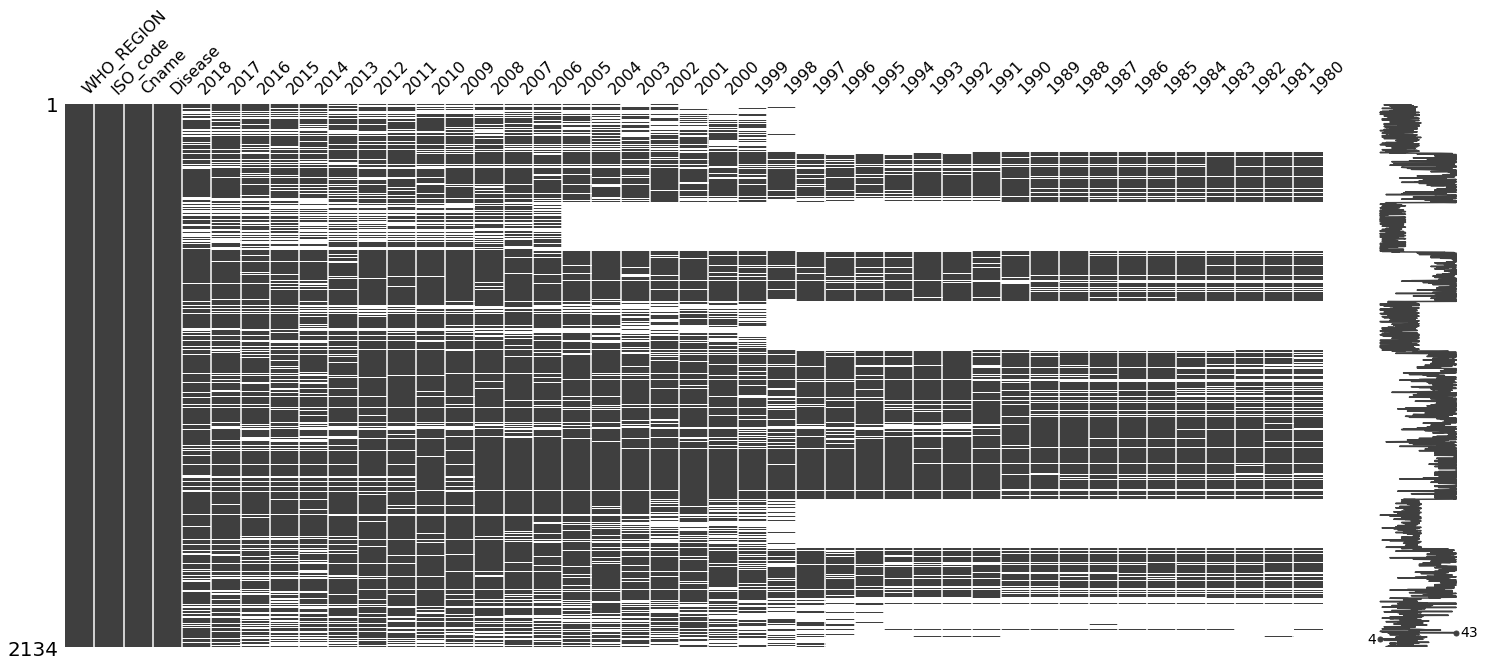

In [17]:
msno.matrix(df)

In [18]:
sarampo = df[df['Disease'] == 'measles']

In [19]:
sarampo.head()

WHO_REGION ISO_code        Cname  ...     1982     1981     1980
582        EMR      AFG  Afghanistan  ...  20320.0  31107.0  32455.0
583        EUR      ALB      Albania  ...      3.0      NaN      NaN
584        AFR      DZA      Algeria  ...  29584.0  20849.0  15527.0
585        EUR      AND      Andorra  ...      NaN      NaN      NaN
586        AFR      AGO       Angola  ...  30067.0  19714.0  29656.0

[5 rows x 43 columns]

In [22]:
sarampo_tidy = pd.melt(sarampo,
                       id_vars=['WHO_REGION', 'ISO_code', 'Cname', 'Disease'],
                       var_name = 'Ano',
                       value_name= 'Qtd')

In [23]:
sarampo_tidy.head()

WHO_REGION ISO_code        Cname  Disease   Ano     Qtd
0        EMR      AFG  Afghanistan  measles  2018  2012.0
1        EUR      ALB      Albania  measles  2018  1469.0
2        AFR      DZA      Algeria  measles  2018  3356.0
3        EUR      AND      Andorra  measles  2018     0.0
4        AFR      AGO       Angola  measles  2018    57.0

In [24]:
total_sarampo = sarampo_tidy.groupby('Ano').sum()

In [25]:
total_sarampo.head()

Qtd
Ano            
1980  3852242.0
1981  4078455.0
1982  3623758.0
1983  3586101.0
1984  3026973.0

In [26]:
total_sarampo = total_sarampo.reset_index()

In [27]:
total_sarampo.head()

Ano        Qtd
0  1980  3852242.0
1  1981  4078455.0
2  1982  3623758.0
3  1983  3586101.0
4  1984  3026973.0

In [29]:
alt.Chart(total_sarampo).mark_circle(color='rebeccapurple').encode(
                                    x = 'Ano',
                                    y = 'Qtd',
                                    size= 'Qtd'
                                    )

alt.Chart(...)

In [30]:
todas_tidy = pd.melt(df,
                    ['WHO_REGION', 'ISO_code', 'Cname', 'Disease'],
                     var_name = 'Ano', 
                     value_name= 'Qtd'
)

In [31]:
totais_ano = todas_tidy.groupby(['Disease', 'Ano']).agg({'Qtd':'sum'})
totais_ano = totais_ano.reset_index()

In [32]:
totais_ano.head()

Disease   Ano  Qtd
0     CRS  1980  0.0
1     CRS  1981  0.0
2     CRS  1982  0.0
3     CRS  1983  0.0
4     CRS  1984  0.0

In [34]:
alt.Chart(totais_ano).mark_circle().encode(
    x = 'Disease', 
    y = 'Ano',
    tooltip = ['Disease', 'Qtd', 'Ano'],
    size = alt.Size('Qtd', scale=alt.Scale(range=[5,8000]), legend=None),
    color = alt.Color('Disease')
).configure_mark(opacity=0.5).properties(width=600)

alt.Chart(...)